<a href="https://colab.research.google.com/github/mardocheeogecime-gif/Rede_Colabora-o_Acad-mica_ECI_UFMG/blob/main/Estudos_egressos_PPGCI_UFMG_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de análises dos dados coletados sobre os egressos do PPGCI da Escola de Ciência da Informação da UFMG

Autoria: PPGCI/UFMG. Desenvolvido por: Mardochée Ogécime / Professor visitante da Escola de Ciência da Informação da UFMG via o Programa de Solidariedade Acadêmica da CAPES.

Saving Banco_Egressos.xlsx to Banco_Egressos.xlsx
Saving Lista de Egressos PPGCI.xlsx to Lista de Egressos PPGCI.xlsx


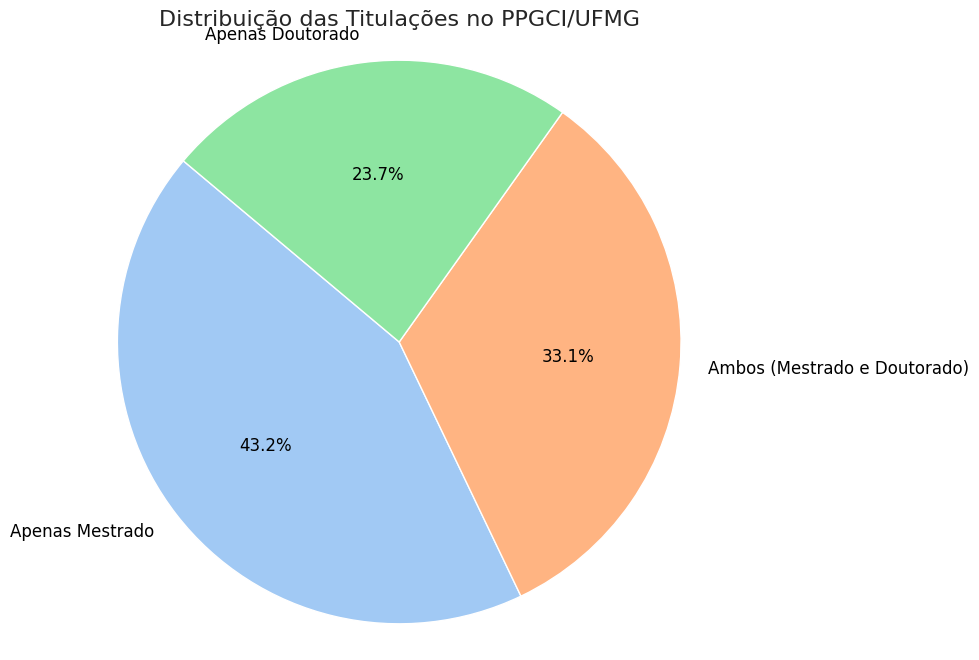

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


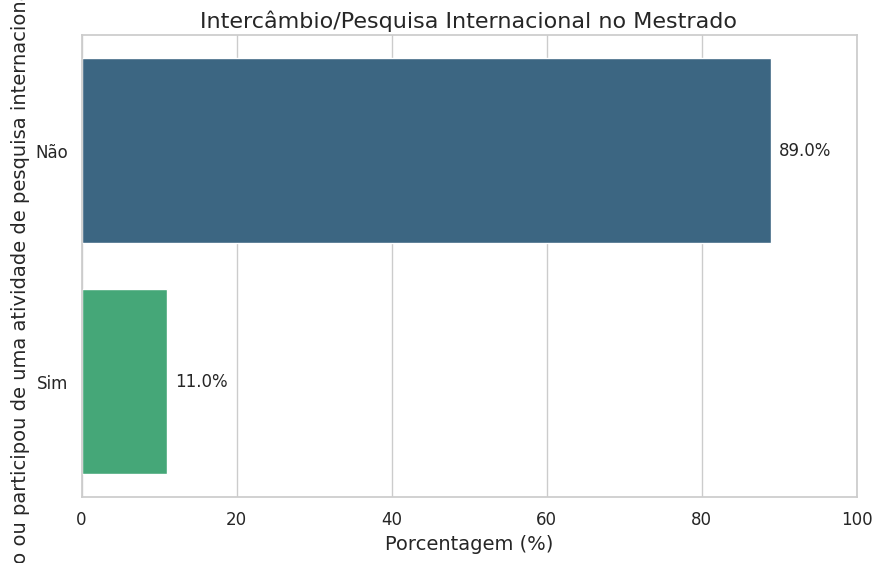

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


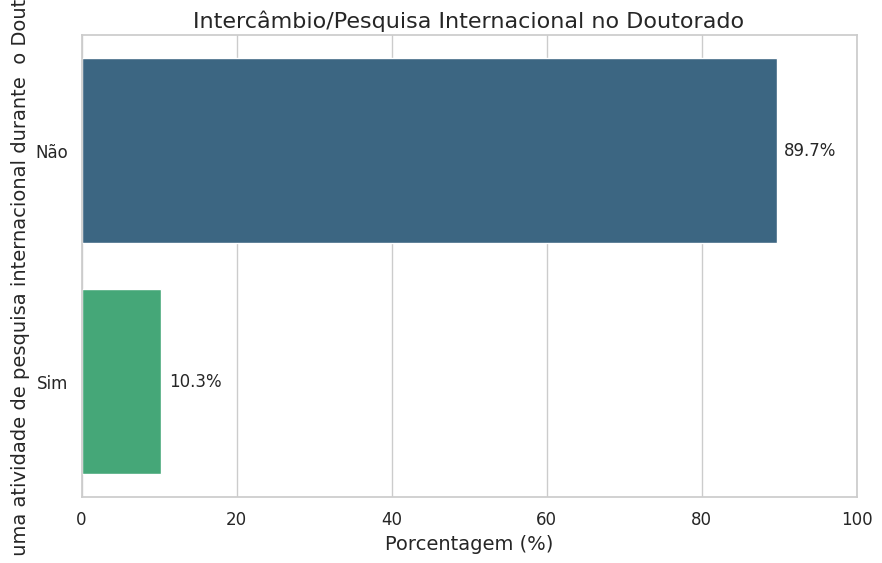

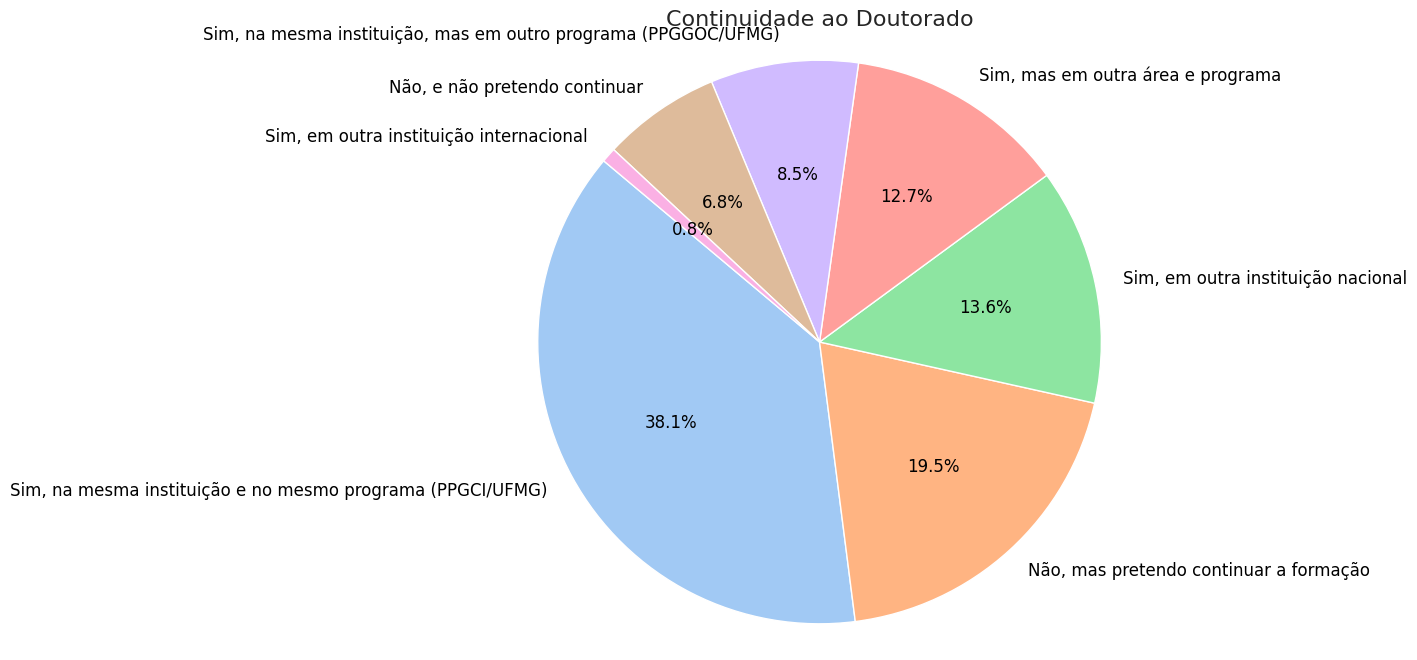

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


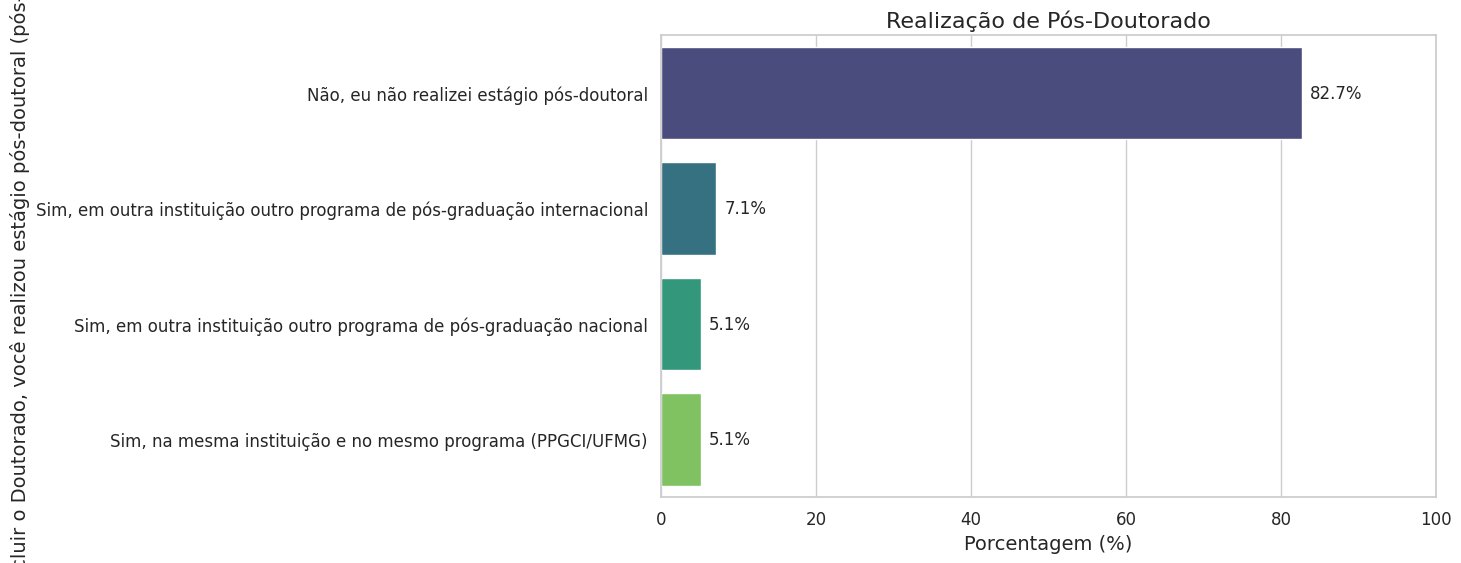

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


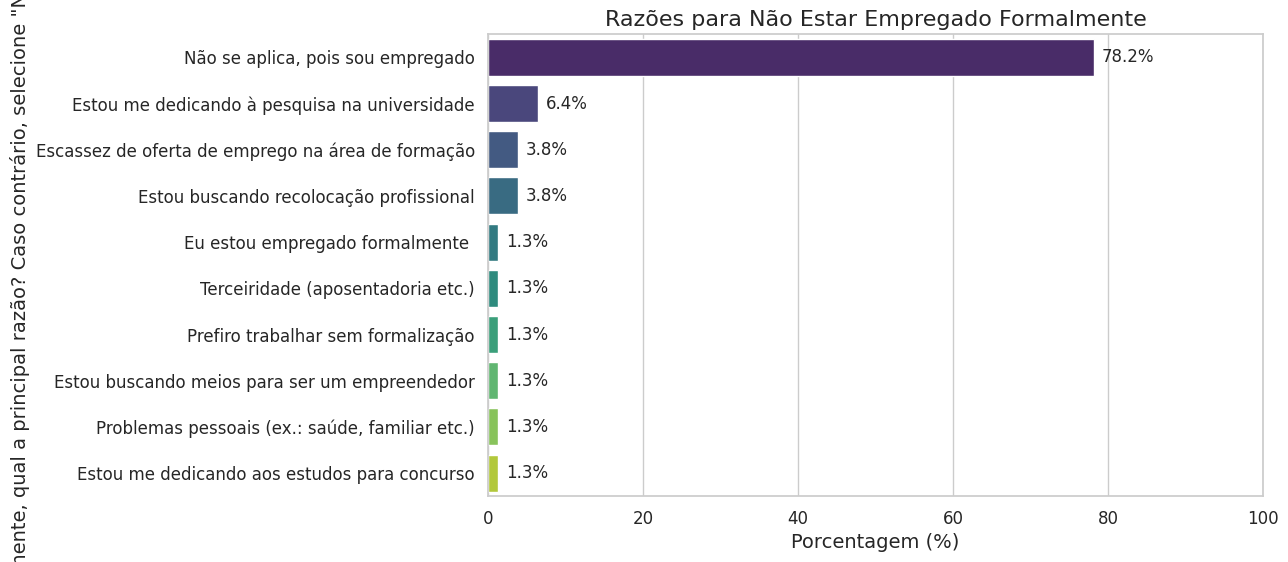

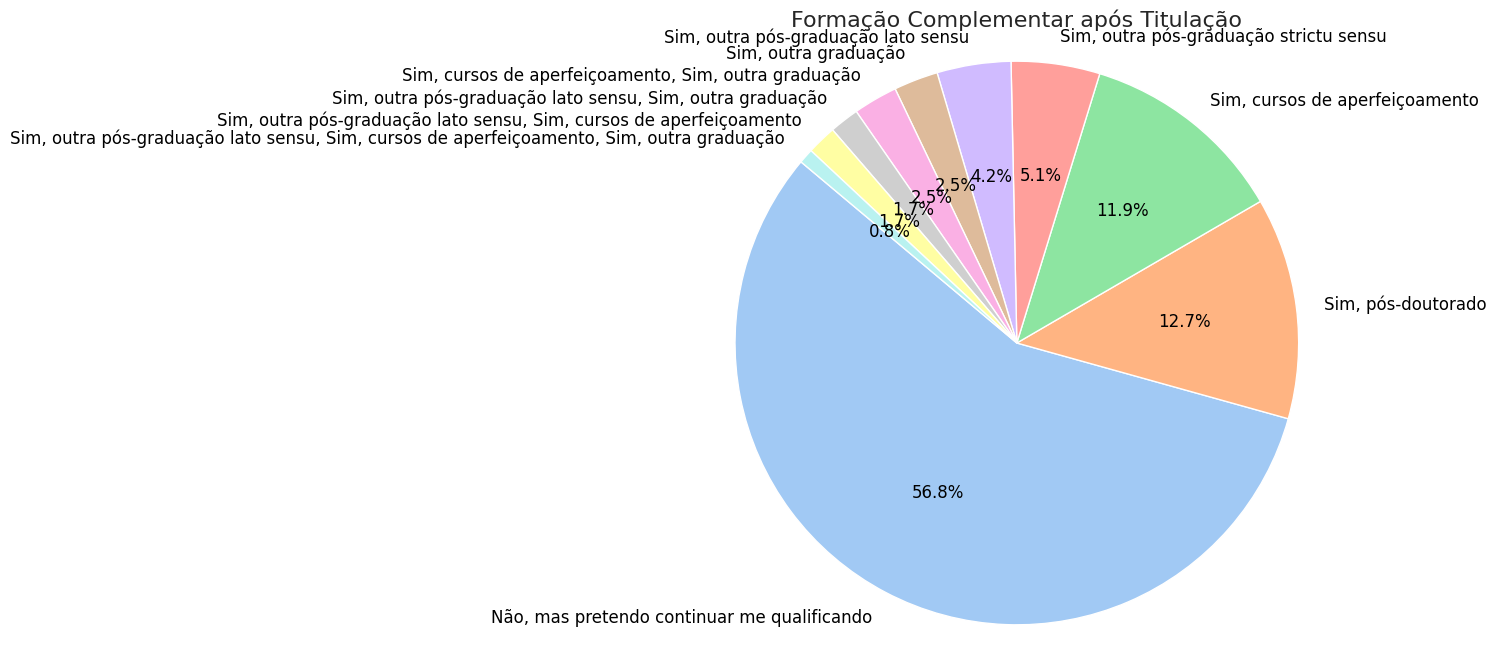

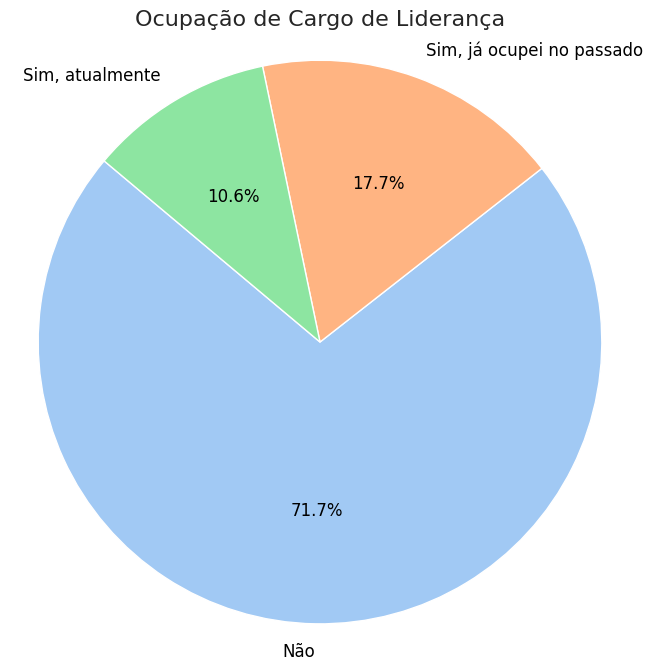

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


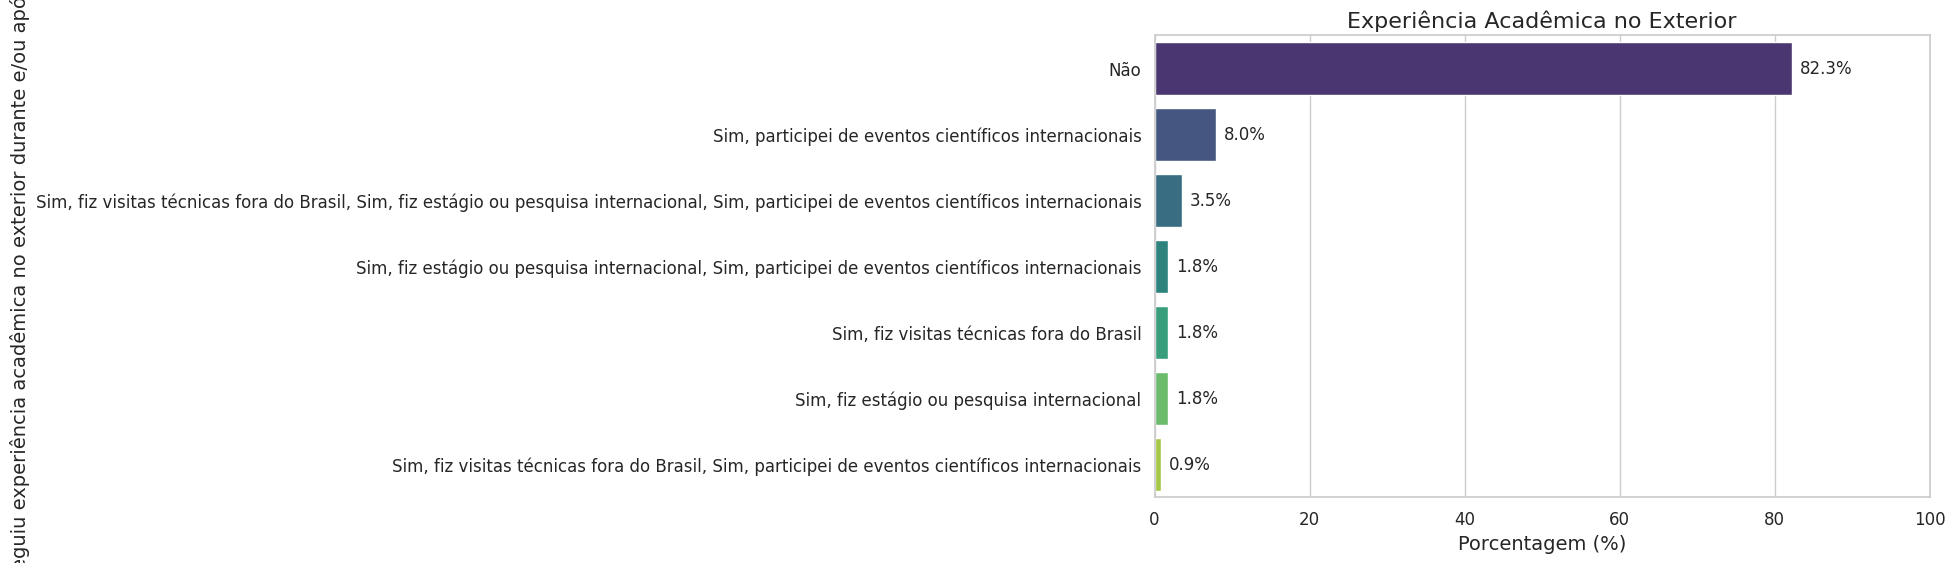

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


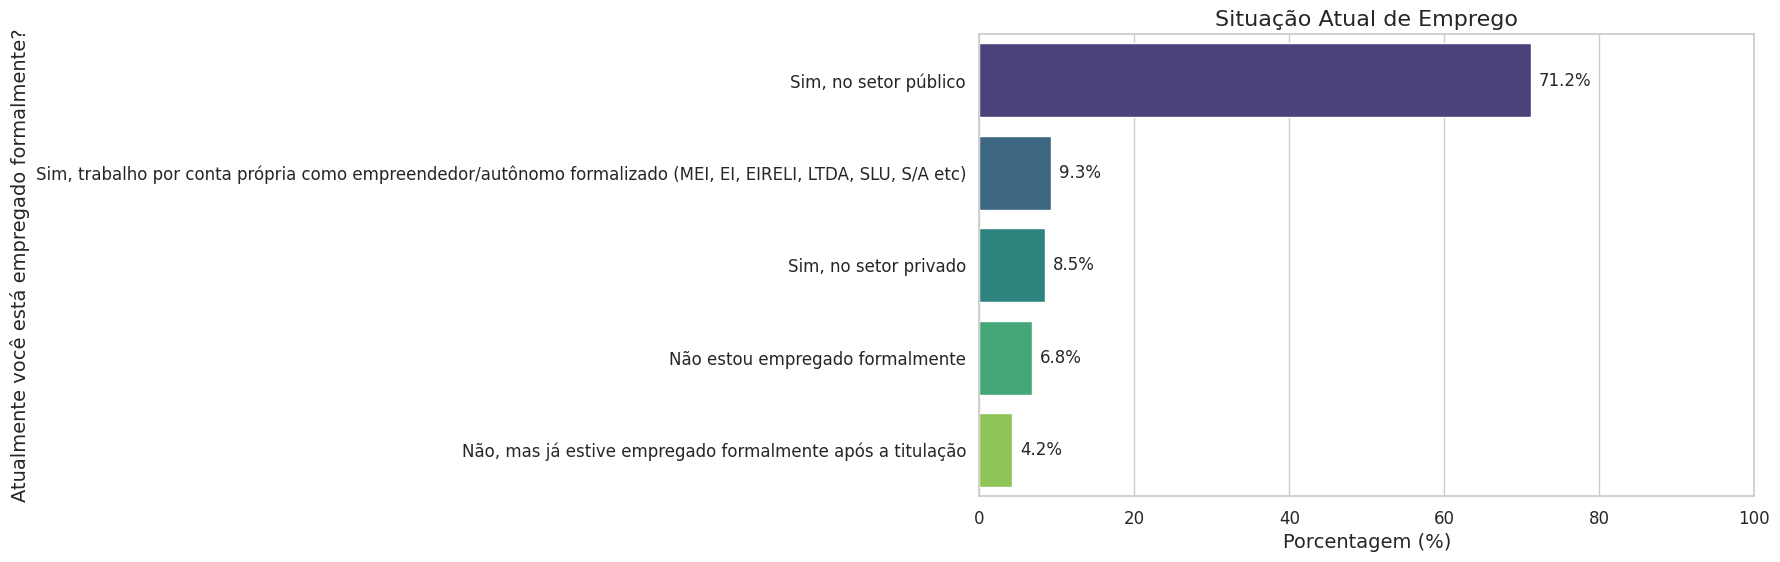

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


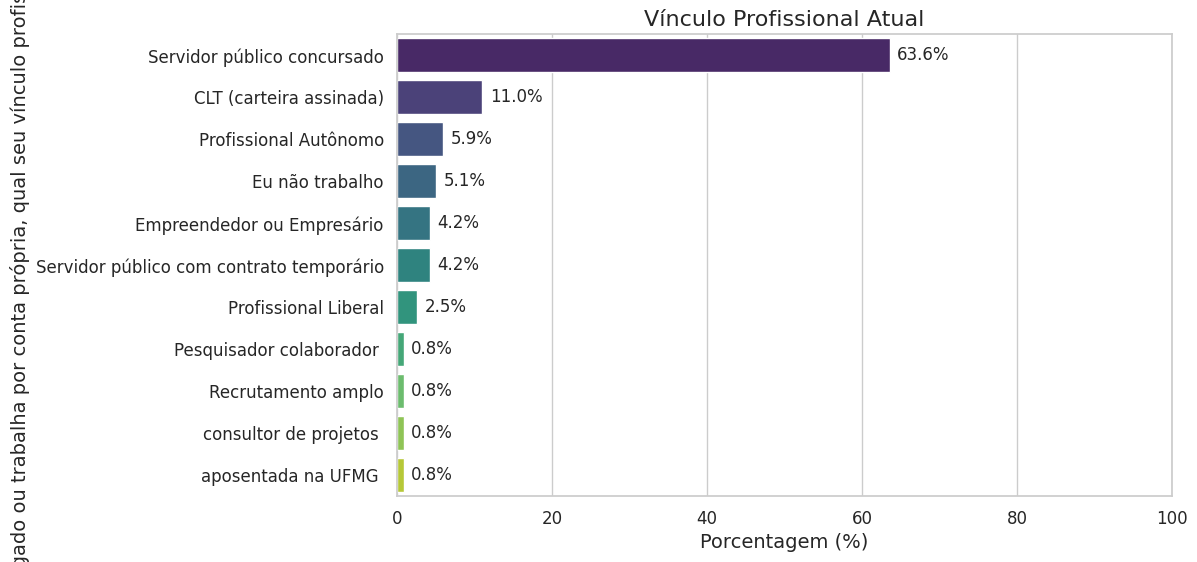

<ipython-input-1-177d80044f9a>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


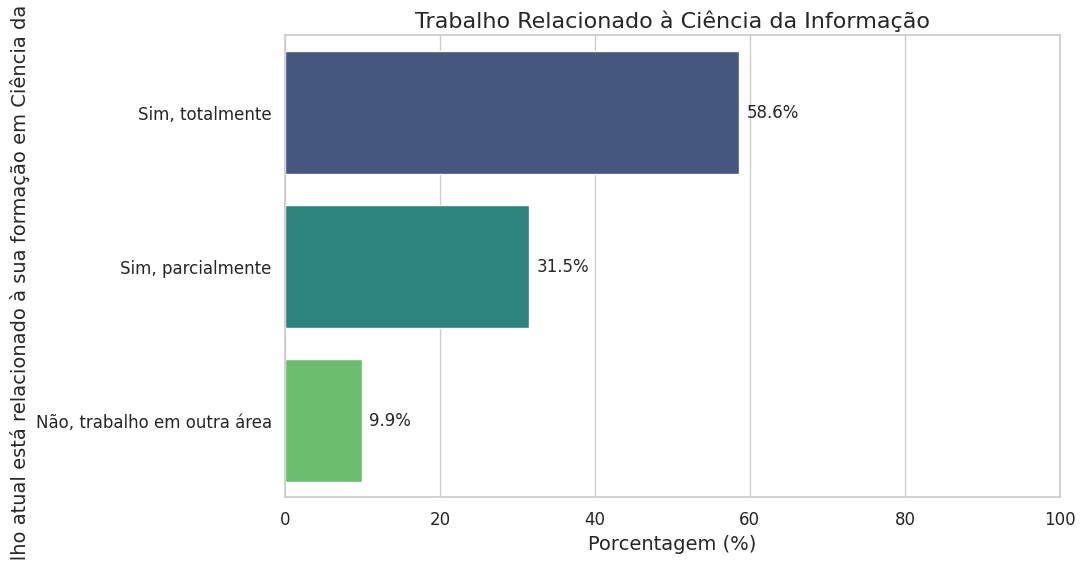

<ipython-input-1-177d80044f9a>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")


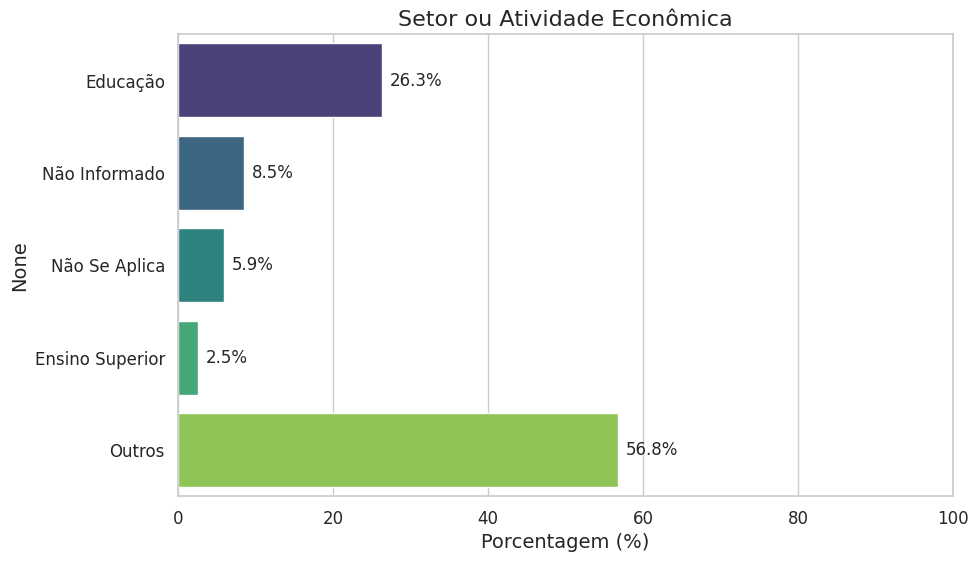

In [1]:
# --- Instalar bibliotecas ---
!pip install pandas matplotlib seaborn openpyxl

# --- Importar pacotes ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- Estilo dos gráficos ---
sns.set(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

# --- Upload dos arquivos .xlsx ---
uploaded = files.upload()

# --- Leitura dos dados ---
banco = pd.read_excel("Banco_Egressos.xlsx", sheet_name="Respostas ao formulário 1")
universo = pd.read_excel("Lista de Egressos PPGCI.xlsx")

# --- Normalização dos nomes ---
banco["nome_normalizado"] = banco["Nome completo (este dado será mantido em sigilo)"].str.strip().str.lower()
universo["nome_normalizado"] = universo["Nome do Egresso"].str.strip().str.lower()

# --- Filtrar universo com base no banco de egressos ---
egresso_nomes = banco["nome_normalizado"].unique()
universo_filtrado = universo[universo["nome_normalizado"].isin(egresso_nomes)]

# --- Escalas fixas ---
TOTAL_MESTRADO = 51
TOTAL_DOUTORADO = 58
TOTAL_TITULOS = TOTAL_MESTRADO + TOTAL_DOUTORADO

# --- Funções de visualização refinadas ---
def plot_percent_bar_fixed(data, title, total):
    counts = data.value_counts()
    if counts.sum() == 0:
        print(f"{title} - Sem dados.")
        return
    percentages = (counts / total * 100)
    percentages = percentages / percentages.sum() * 100  # normalizar soma = 100%

    plt.figure()
    sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")
    plt.title(title)
    plt.xlabel("Porcentagem (%)")
    plt.xlim(0, 100)
    for i, v in enumerate(percentages.values):
        plt.text(v + 1, i, f'{v:.1f}%', va='center')
    plt.show()

def plot_percent_pie_fixed(data, title, total):
    counts = data.value_counts()
    if counts.sum() == 0:
        print(f"{title} - Sem dados.")
        return
    sizes = [v / total * 100 for v in counts]
    total_percent = sum(sizes)
    normalized_sizes = [s / total_percent * 100 for s in sizes]
    labels = counts.index
    colors = sns.color_palette('pastel')[0:len(sizes)]

    plt.figure(figsize=(8, 8))
    plt.pie(
        normalized_sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, textprops=dict(color="black"),
        wedgeprops=dict(edgecolor='white')
    )
    plt.title(title)
    plt.axis('equal')
    plt.show()

def plot_top_n_categories_cleaned(data, title, total, top_n=4):
    if data.dropna().empty:
        print(f"{title} - Sem dados.")
        return

    # Limpeza e padronização de categorias semelhantes
    data_cleaned = data.fillna("Não informado").str.strip().str.lower()
    data_cleaned = data_cleaned.replace({
        "educação ": "educação",
        "educacao": "educação",
        "setor educacional": "educação"
    })
    data_cleaned = data_cleaned.str.title()

    counts = data_cleaned.value_counts()

    if len(counts) > top_n:
        top_counts = counts.iloc[:top_n]
        other_count = counts.iloc[top_n:].sum()
        counts = pd.concat([top_counts, pd.Series({'Outros': other_count})])

    percentages = (counts / total * 100)
    percentages = percentages / percentages.sum() * 100  # normalizar para 100%

    plt.figure()
    sns.barplot(x=percentages.values, y=percentages.index, palette="viridis")
    plt.title(title)
    plt.xlabel("Porcentagem (%)")
    plt.xlim(0, 100)
    for i, v in enumerate(percentages.values):
        plt.text(v + 1, i, f'{v:.1f}%', va='center')
    plt.show()

# --- GERAÇÃO DOS GRÁFICOS FINALIZADOS ---

plot_percent_pie_fixed(
    banco["Você realizou o mestrado e/ou doutorado no PPGCI da UFMG?"],
    "Distribuição das Titulações no PPGCI/UFMG",
    TOTAL_TITULOS
)

plot_percent_bar_fixed(
    banco["Você realizou um intercâmbio ou participou de uma atividade de pesquisa internacional durante ou após o Mestrado?"],
    "Intercâmbio/Pesquisa Internacional no Mestrado",
    TOTAL_MESTRADO
)

plot_percent_bar_fixed(
    banco["Você realizou um intercâmbio ou participou de uma atividade de pesquisa internacional durante  o Doutorado? (Visita técnica, Doutorado sanduiche etc.)"],
    "Intercâmbio/Pesquisa Internacional no Doutorado",
    TOTAL_DOUTORADO
)

plot_percent_pie_fixed(
    banco["Após concluir o Mestrado, você deu continuidade ao Doutorado?"],
    "Continuidade ao Doutorado",
    TOTAL_MESTRADO
)

plot_percent_bar_fixed(
    banco["Após concluir o Doutorado, você realizou estágio pós-doutoral (pós-doutorado)?"],
    "Realização de Pós-Doutorado",
    TOTAL_DOUTORADO
)

plot_percent_bar_fixed(
    banco['Se não está empregado formalmente, qual a principal razão? Caso contrário, selecione "Não se aplica, pois sou empregado"'],
    "Razões para Não Estar Empregado Formalmente",
    TOTAL_TITULOS
)

plot_percent_pie_fixed(
    banco["Você realizou ou está realizando formação complementar após o mestrado/doutorado?"],
    "Formação Complementar após Titulação",
    TOTAL_TITULOS
)

plot_percent_pie_fixed(
    banco["Você ocupa ou já ocupou cargo de liderança em organizações da sociedade civil (por exemplo, ONGs), científicas ou profissionais?"],
    "Ocupação de Cargo de Liderança",
    TOTAL_TITULOS
)

plot_percent_bar_fixed(
    banco["Você conseguiu experiência acadêmica no exterior durante e/ou após a titulação?"],
    "Experiência Acadêmica no Exterior",
    TOTAL_TITULOS
)

plot_percent_bar_fixed(
    banco["Atualmente você está empregado formalmente?"],
    "Situação Atual de Emprego",
    TOTAL_TITULOS
)

plot_percent_bar_fixed(
    banco["Se empregado ou trabalha por conta própria, qual seu vínculo profissional atual?"],
    "Vínculo Profissional Atual",
    TOTAL_TITULOS
)

plot_percent_bar_fixed(
    banco["Seu trabalho atual está relacionado à sua formação em Ciência da Informação?"],
    "Trabalho Relacionado à Ciência da Informação",
    TOTAL_TITULOS
)

# Gráfico corrigido: setores agrupados e normalizados
plot_top_n_categories_cleaned(
    banco['Em que segmento/setor ou atividade econômica? Caso não esteja empregado ou trabalhe, escreva "Não se aplica".'],
    "Setor ou Atividade Econômica",
    TOTAL_TITULOS,
    top_n=4
)

# Distribuição internacional dos egressos no periódo de observação

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 119.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWar

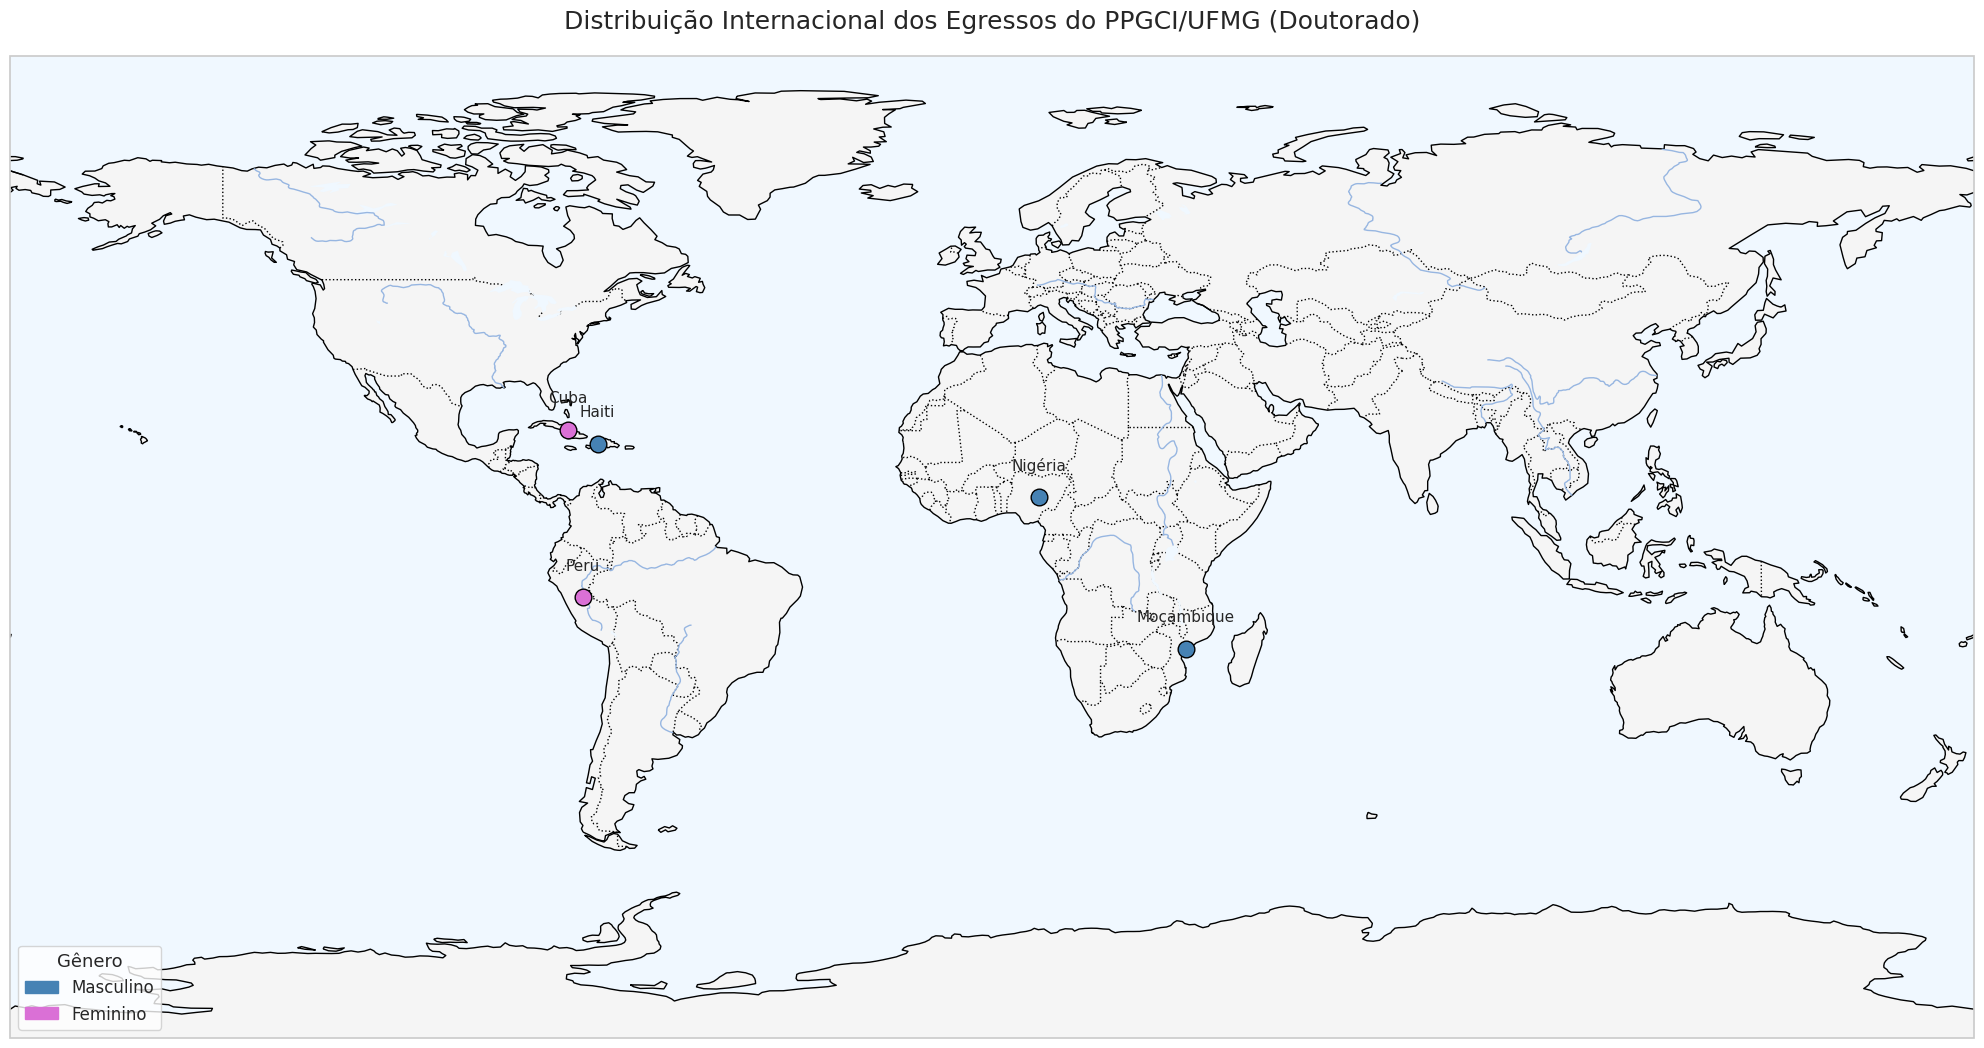

In [2]:
# --- Instalar bibliotecas no Colab ---
!pip install cartopy geopandas matplotlib

# --- Importar bibliotecas ---
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# --- Dados dos egressos internacionais ---
dados_geo = pd.DataFrame({
    "País": ["Moçambique", "Nigéria", "Cuba", "Peru", "Haiti"],
    "Latitude": [-18.665695, 9.0820, 21.5218, -9.19, 18.9712],
    "Longitude": [35.529562, 8.6753, -77.7812, -75.0152, -72.2852],
    "Gênero": ["Masculino", "Masculino", "Feminino", "Feminino", "Masculino"]
})

# --- Cores por gênero ---
cores = {"Masculino": "steelblue", "Feminino": "orchid"}

# --- Criar o mapa ---
plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.add_feature(cfeature.LAKES, facecolor='aliceblue')
ax.add_feature(cfeature.RIVERS)

# --- Plotar os pontos ---
for _, row in dados_geo.iterrows():
    ax.plot(row["Longitude"], row["Latitude"],
            marker='o',
            color=cores[row["Gênero"]],
            markersize=12,
            markeredgecolor='black',
            transform=ccrs.PlateCarree())
    ax.text(row["Longitude"], row["Latitude"] + 5,
            row["País"],
            fontsize=11,
            ha='center',
            transform=ccrs.PlateCarree())

# --- Legenda personalizada ---
import matplotlib.patches as mpatches
legenda = [
    mpatches.Patch(color='steelblue', label='Masculino'),
    mpatches.Patch(color='orchid', label='Feminino')
]
plt.legend(handles=legenda, title="Gênero", loc='lower left', fontsize=12, title_fontsize=13)

# --- Título e layout ---
plt.title("Distribuição Internacional dos Egressos do PPGCI/UFMG (Doutorado)", fontsize=18, pad=20)
plt.tight_layout()
plt.show()

# Distribuição Nacional e Internacional

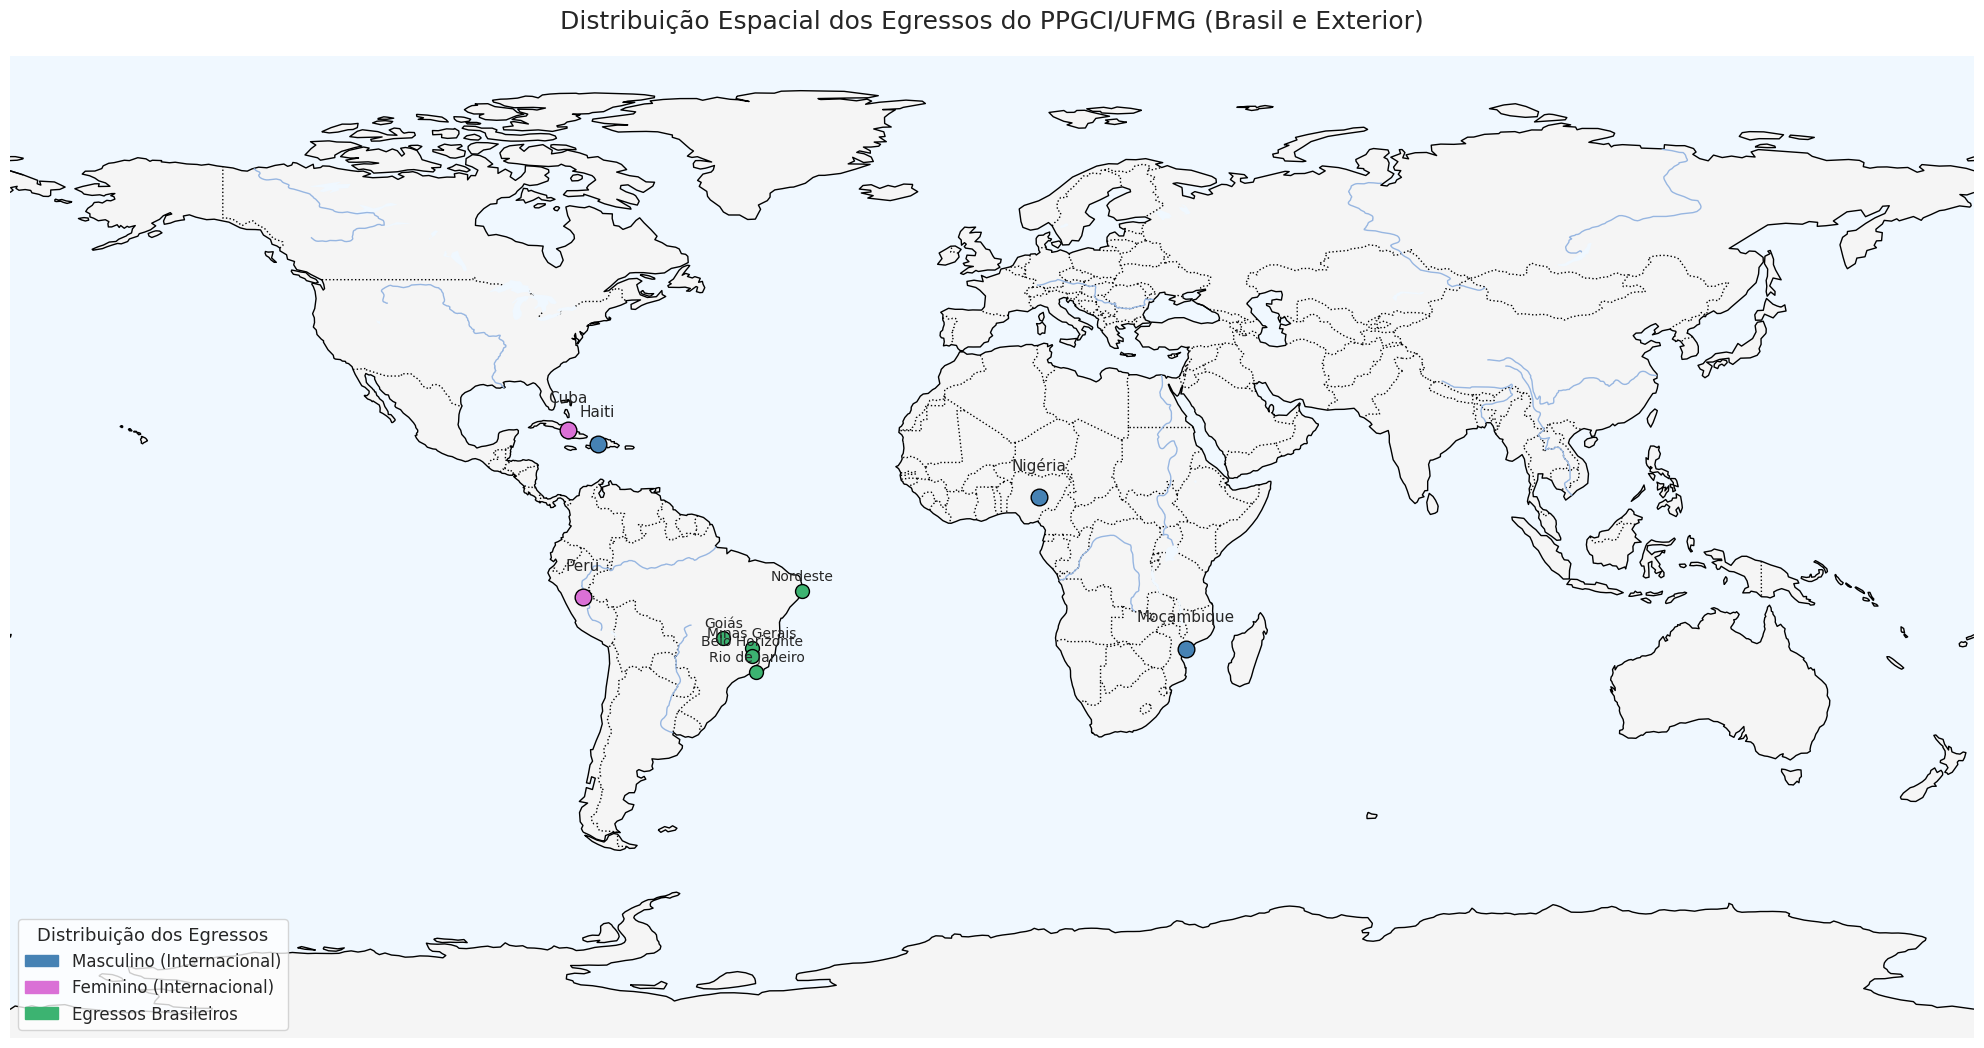

In [3]:
# Instale se ainda não tiver no ambiente:
# !pip install cartopy

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Egressos internacionais (5 casos)
dados_internacionais = pd.DataFrame({
    "Local": ["Moçambique", "Nigéria", "Cuba", "Peru", "Haiti"],
    "Latitude": [-18.665695, 9.0820, 21.5218, -9.19, 18.9712],
    "Longitude": [35.529562, 8.6753, -77.7812, -75.0152, -72.2852],
    "Gênero": ["Masculino", "Masculino", "Feminino", "Feminino", "Masculino"]
})

# Egressos nacionais (Minas Gerais + RJ + GO + Nordeste)
dados_nacionais = pd.DataFrame({
    "Estado": [
        "Minas Gerais", "Belo Horizonte", "Rio de Janeiro", "Goiás", "Nordeste"
    ],
    "Latitude": [
        -18.5, -19.92, -22.90, -16.68, -8.05  # Aproximações
    ],
    "Longitude": [
        -44.0, -43.94, -43.17, -49.25, -34.88  # Nordeste usa Recife como ponto
    ],
    "Tipo": [
        "Estado", "Capital", "Fronteiriço", "Fronteiriço", "Exceção"
    ]
})

# Cores
cores_internacional = {"Masculino": "steelblue", "Feminino": "orchid"}
cor_nacional = "mediumseagreen"

# Criar mapa
plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.add_feature(cfeature.LAKES, facecolor='aliceblue')
ax.add_feature(cfeature.RIVERS)

# Plotar pontos internacionais
for _, row in dados_internacionais.iterrows():
    ax.plot(row["Longitude"], row["Latitude"],
            marker='o',
            color=cores_internacional[row["Gênero"]],
            markersize=12,
            markeredgecolor='black',
            transform=ccrs.PlateCarree())
    ax.text(row["Longitude"], row["Latitude"] + 5,
            row["Local"],
            fontsize=11,
            ha='center',
            transform=ccrs.PlateCarree())

# Plotar pontos nacionais
for _, row in dados_nacionais.iterrows():
    ax.plot(row["Longitude"], row["Latitude"],
            marker='o',
            color=cor_nacional,
            markersize=10,
            markeredgecolor='black',
            transform=ccrs.PlateCarree())
    ax.text(row["Longitude"], row["Latitude"] + 2,
            row["Estado"],
            fontsize=10,
            ha='center',
            transform=ccrs.PlateCarree())

# Legenda
import matplotlib.patches as mpatches
legenda = [
    mpatches.Patch(color='steelblue', label='Masculino (Internacional)'),
    mpatches.Patch(color='orchid', label='Feminino (Internacional)'),
    mpatches.Patch(color='mediumseagreen', label='Egressos Brasileiros')
]
plt.legend(handles=legenda, title="Distribuição dos Egressos", loc='lower left', fontsize=12, title_fontsize=13)

# Título e layout
plt.title("Distribuição Espacial dos Egressos do PPGCI/UFMG (Brasil e Exterior)", fontsize=18, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()
